# 1. 데이터 불러오기 및 데이터셋 분할

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data=pd.read_csv('Fvote.csv',encoding = 'utf-8')

In [3]:
X=data[data.columns[1:13]]
y=data[['vote']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

# 2. Grid Search

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
grid_search = GridSearchCV(LogisticRegression(), param_grid,cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [10]:
print("Best Parameter :",grid_search.best_params_)
print("Best Cross-validity Score : ",grid_search.best_score_)

Best Parameter : {'C': 10}
Best Cross-validity Score :  0.7274193548387096


In [11]:
print("Test Set Score : ",grid_search.score(X_test,y_test))

Test Set Score :  0.6792452830188679


In [12]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013362,0.001623,0.003392,0.001017,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.006777,0.002225,0.001596,0.000797,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.012359,0.001506,0.002594,0.000786,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.019557,0.004434,0.002184,0.000386,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.024337,0.005227,0.001394,0.000487,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.023335,0.002238,0.002194,0.000746,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


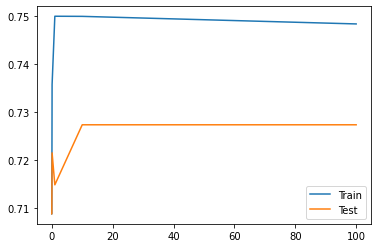

In [14]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'],result_grid['mean_train_score'],label='Train')
plt.plot(result_grid['param_C'],result_grid['mean_test_score'],label='Test')
plt.legend()

# 3. Random Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C' : randint(low=0.001,high=100)}

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
random_search = RandomizedSearchCV(LogisticRegression(),param_distributions = param_distribs,
                                  cv=5,return_train_score=True)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028A36C19E80>},
                   return_train_score=True)

In [18]:
print("Best Parameter :",random_search.best_params_)
print("Best Cross-validity Score : ",random_search.best_score_)

Best Parameter : {'C': 67}
Best Cross-validity Score :  0.7274193548387096


In [19]:
print("Test Set Score : ",grid_search.score(X_test,y_test))

Test Set Score :  0.6792452830188679


In [20]:
random_grid = pd.DataFrame(random_search.cv_results_)
random_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024830,0.007437,0.001810,0.000387,67,{'C': 67},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.016746,0.000733,0.001803,0.000766,3,{'C': 3},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
2,0.024645,0.006155,0.002197,0.000746,80,{'C': 80},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.022133,0.001712,0.001808,0.000374,24,{'C': 24},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.019152,0.003044,0.001805,0.000405,46,{'C': 46},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.021710,0.005776,0.002030,0.000019,55,{'C': 55},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
6,0.022348,0.003811,0.001605,0.000803,99,{'C': 99},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.017745,0.003477,0.002793,0.001596,2,{'C': 2},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.738095,0.769841,0.730159,0.779528,0.724409,0.748406,0.022105
8,0.062268,0.032320,0.005179,0.002993,74,{'C': 74},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.025633,0.006597,0.001995,0.000892,73,{'C': 73},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


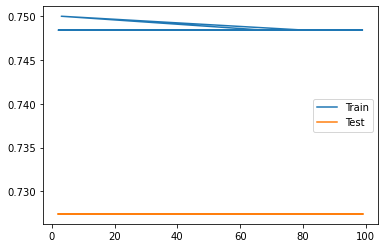

In [21]:
import matplotlib.pyplot as plt
plt.plot(random_grid['param_C'],random_grid['mean_train_score'],label='Train')
plt.plot(random_grid['param_C'],random_grid['mean_test_score'],label='Test')
plt.legend()

# 4. 모델평가

In [24]:
Final_model = LogisticRegression(C=10)
Final_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [30]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train,y_train)

0.740506329113924

In [31]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test,y_test)

0.6792452830188679

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_train = confusion_matrix(y_train,pred_train)
print("훈련데이터 오차행렬 : \n",confusion_train)

훈련데이터 오차행렬 : 
 [[ 12  34]
 [  7 105]]


In [34]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train,pred_train)
print("분류예측 리포트 : \n",cfreport_train)

분류예측 리포트 : 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [35]:
confusion_test = confusion_matrix(y_test,pred_test)
print("테스트 데이터 오차행렬 :\n",confusion_test )


테스트 데이터 오차행렬 :
 [[ 3 12]
 [ 5 33]]


In [36]:
cfreport_test = classification_report(y_test,pred_test)
print("분류예측 리포트 : \n",cfreport_test)

분류예측 리포트 : 
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [39]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
fp_rate,tp_rate,thresholds = roc_curve(y_test,Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test,Final_model.decision_function(X_test))

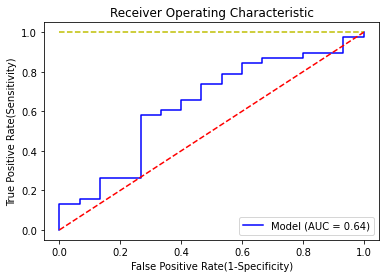

In [41]:
plt.title("Receiver Operating Characteristic")
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(fp_rate,tp_rate, 'b',label='Model (AUC = %0.2f)'%roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()